In [1]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
if __name__ == "__main__":
    for data_name in ["mnist", "spam", "toy"]:
        data = np.load(f"/Users/alitout/Desktop/VSCode_Work/CS189/hw1/data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 37)
training_data (4171, 37)
training_labels (4171,)

loaded toy data!
test_data (0,)
training_data (1000, 2)
training_labels (1000,)


In [2]:
data = np.load("/Users/alitout/Desktop/VSCode_Work/CS189/hw1/data/mnist-data.npz")

In [3]:
data['training_data']

array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       ...,


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 

In [4]:
data['training_data'].shape

(60000, 1, 28, 28)

In [5]:
data_spam = np.load("/Users/alitout/Desktop/VSCode_Work/CS189/hw1/data/spam-data.npz")

In [6]:
data_spam['training_data']

array([[0., 0., 0., ..., 0., 3., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
data_spam['training_labels']

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
import random
random.seed(1)
arr = list(np.arange(len(data_spam['training_data'])))
t = random.sample(arr, len(arr))
master_spam = data_spam['training_data'][t]
master_labels = data_spam['training_labels'][t]

arr_2 = list(np.arange(len(data['training_data'])))
t_2 = random.sample(arr_2, len(arr_2))
master_mnist = data['training_data'][t_2]
master_mnist_labels = data['training_labels'][t_2]

In [9]:
#valid_data_sample = shuffled_data_sample[:int(len(shuffled_data_sample)*0.8)]
#valid_data_labels = shuffled_labels[:int(len(shuffled_labels)*0.8)]

shuffled_data_sample = master_spam[:int(len(master_spam)*0.8)]
shuffled_labels = master_labels[:int(len(master_labels)*0.8)]
valid_data_sample = master_spam[int(len(master_spam)*0.8):]
valid_data_labels = master_labels[int(len(master_labels)*0.8):]

shuffled_mnist_data = master_mnist[10000:]
shuffled_mnist_labels = master_mnist_labels[10000:]
valid_mnist_data = master_mnist[:10000]
valid_mnist_labels = master_mnist_labels[:10000]

In [10]:
#Part b

In [45]:
def evaluation(y_true, y_pred):
    score = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            score = score + 1
    return score/len(y_true)

Question 4

In [12]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
sv_lin = LinearSVC()
def trainer(num):
    sv_lin.fit(shuffled_data_sample[:num], shuffled_labels[:num])
    y_pred_valid = sv_lin.predict(valid_data_sample)
    eval_num_valid = evaluation(valid_data_labels, y_pred_valid)

    y_pred_train = sv_lin.predict(shuffled_data_sample[:num])
    eval_num_train =  evaluation(shuffled_labels[:num], y_pred_train)

    return eval_num_train, eval_num_valid



In [13]:
eval_100_train, eval_100_valid = trainer(100)
eval_200_train, eval_200_valid = trainer(200)
eval_500_train, eval_500_valid = trainer(500)
eval_1000_train, eval_1000_valid = trainer(1000)
eval_2000_train, eval_2000_valid = trainer(2000)
eval_all_train, eval_all_valid = trainer(len(shuffled_labels))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increas

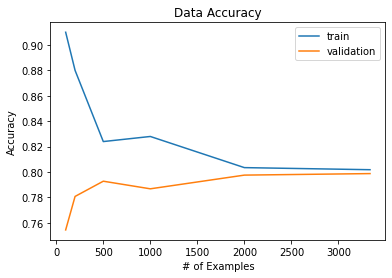

In [14]:
plt.title('Data Accuracy')
plt.xlabel('# of Examples')
plt.ylabel('Accuracy')
plt.plot([100, 200, 500, 1000, 2000, len(shuffled_labels)], [eval_100_train, eval_200_train, eval_500_train, eval_1000_train, eval_2000_train, eval_all_train], label = 'train')
plt.plot([100, 200, 500, 1000, 2000, len(shuffled_labels)], [eval_100_valid, eval_200_valid, eval_500_valid, eval_1000_valid, eval_2000_valid, eval_all_valid], label = 'validation')
plt.legend()

In [15]:
shuffled_mnist_data = shuffled_mnist_data.reshape(len(shuffled_mnist_data), -1)
valid_mnist_data = valid_mnist_data.reshape(len(valid_mnist_data), -1)

In [16]:
def trainer(num):
    sv_lin.fit(shuffled_mnist_data[:num], shuffled_mnist_labels[:num])
    y_pred_valid = sv_lin.predict(valid_mnist_data)
    eval_num_valid = evaluation(valid_mnist_labels, y_pred_valid)

    y_pred_train = sv_lin.predict(shuffled_mnist_data[:num])
    eval_num_train =  evaluation(shuffled_mnist_labels[:num], y_pred_train)

    return eval_num_train, eval_num_valid

In [17]:
eval_100_train, eval_100_valid = trainer(100)
eval_200_train, eval_200_valid = trainer(200)
eval_500_train, eval_500_valid = trainer(500)
eval_1000_train, eval_1000_valid = trainer(1000)
eval_2000_train, eval_2000_valid = trainer(2000)
eval_5000_train, eval_5000_valid = trainer(5000)
eval_10000_train, eval_10000_valid = trainer(10000)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


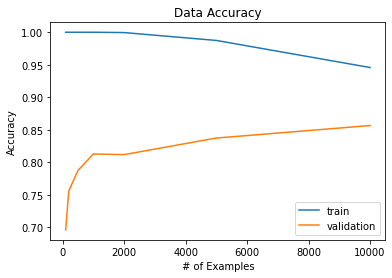

In [18]:
plt.title('Data Accuracy')
plt.xlabel('# of Examples')
plt.ylabel('Accuracy')
plt.plot([100, 200, 500, 1000, 2000, 5000, 10000], [eval_100_train, eval_200_train, eval_500_train, eval_1000_train, eval_2000_train, eval_5000_train, eval_10000_train], label = 'train')
plt.plot([100, 200, 500, 1000, 2000, 5000, 10000], [eval_100_valid, eval_200_valid, eval_500_valid, eval_1000_valid, eval_2000_valid, eval_5000_valid, eval_10000_valid], label = 'validation')
plt.legend()

Question 5 

In [19]:
from sklearn.svm import SVC

In [20]:
ans = 0
ans_ind = 0
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.5, 0.1, 1]:
    svc = LinearSVC(C = i)
    svc.fit(shuffled_mnist_data[:20000], shuffled_mnist_labels[:20000])
    y_pred_valid = svc.predict(valid_mnist_data)
    eval_num_valid = evaluation(valid_mnist_labels, y_pred_valid)
    if ans < eval_num_valid:
        ans = eval_num_valid
        ans_ind = i
print('The best C is:', ans_ind, 'with an accuracy of:', ans)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increas

The best C is: 1e-06 with an accuracy of: 0.9056


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Question 6

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
def K_Fold_runner(C_val=1):
    sv_lin = LinearSVC(C = C_val)
    arr = list(np.arange(len(data_spam['training_data'])))
    t = random.sample(arr, len(arr))
    master_spam = data_spam['training_data'][t]
    master_labels = data_spam['training_labels'][t]
    results = []
    for part in [0.2, 0.4, 0.6, 0.8, 1]:
        left = part - 0.2
        right = part
        valid_data_sample = master_spam[int(len(master_spam)*left):int(len(master_spam)*right)]
        valid_data_labels = master_labels[int(len(master_spam)*left):int(len(master_spam)*right)]

        shuffled_data_sample = np.array([master_spam[i] for i in range(len(master_spam)) if i not in range(int(len(master_spam)*left), int(len(master_spam)*right))])
        shuffled_labels = np.array([master_labels[i] for i in range(len(master_labels)) if i not in range(int(len(master_labels)*left), int(len(master_labels)*right))])

        sv_lin.fit(shuffled_data_sample, shuffled_labels)
        y_pred = sv_lin.predict(valid_data_sample)
        results.append(evaluation(valid_data_labels, y_pred))
    return np.mean(results)

In [23]:
best_ind = 0
best_acc = 0
for i in [0.01, 0.5, 0.1, 1, 10, 100, 200, 500]:
    result = K_Fold_runner(i)
    if best_acc < result:
        best_acc = result
        best_ind = i
    print(f"Accuracy for C={i} is:_{result}")
print('Best is:', best_ind, "with accuracy:", best_acc)

Accuracy for C=0.01 is:_0.7954941914731688
Accuracy for C=0.5 is:_0.7981309323798447
Accuracy for C=0.1 is:_0.7940562041384855
Accuracy for C=1 is:_0.8010115021755052
Accuracy for C=10 is:_0.8019618317322189
Accuracy for C=100 is:_0.799573514840822
Accuracy for C=200 is:_0.791651804305059
Accuracy for C=500 is:_0.7681600827122732
Best is: 10 with accuracy: 0.8019618317322189


Question 7

In [85]:
import pandas as pd
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,10,100, 200], 'kernel':['rbf', 'poly', 'linear'], 'degree':[3,4], 'class_weight':[None, 'balanced']}
sv = SVC()
grid = GridSearchCV(sv, param_grid)
grid.fit(master_spam, master_labels)
grid.best_params_


{'C': 100, 'class_weight': None, 'degree': 3, 'kernel': 'rbf'}

In [28]:
grid.best_score_

0.8261761369347637

In [11]:
from sklearn.svm import SVC
final_sv = SVC(C = 100, kernel = 'rbf')
final_sv.fit(master_spam, master_labels)
y_finals = final_sv.predict(data_spam['test_data'])
results_to_csv(y_finals)

In [28]:
param_grid = {'C':[0.000001, 0.00000001, 0.01, 1], 'penalty':['l1', 'l2'], 'class_weight':[None, 'balanced']}
sv = LinearSVC()
grid = GridSearchCV(sv, param_grid, verbose = 1)
#grid.fit(shuffled_mnist_data, shuffled_mnist_labels)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [1e-06, 1e-08, 0.01, 1],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [30]:
#param_grid = {'C':[0.000001, 0.0001, 0.01, 1], 'kernel':['rbf', 'poly'], 'degree':[3,4], 'class_weight':[None, 'balanced']}
#sv = SVC()
#grid = GridSearchCV(sv, param_grid, verbose = 1)
#master_mnist = master_mnist.reshape(len(master_mnist), -1)
#grid.fit(master_mnist, master_mnist_labels)
#grid.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [30]:
#grid.best_score_

0.90966

In [15]:
from sklearn.svm import SVC
master_mnist = master_mnist.reshape(len(master_mnist), -1)
#final_sv = LinearSVC(C = 0.000001, class_weight = 'balanced')
final_sv = SVC(kernel = 'rbf', class_weight = 'balanced')

final_sv.fit(master_mnist, master_mnist_labels)
y_finals = final_sv.predict(data['test_data'].reshape(len(data['test_data']), -1))
results_to_csv(y_finals)

Attempt to create bag of words

In [150]:
import os
import glob
spam_data = []
#for filename in os.listdir("/Users/alitout/Desktop/VSCode_Work/CS189/hw1/data/spam"):
for filename in glob.glob("/Users/alitout/Desktop/VSCode_Work/CS189/hw1/data/spam/" + '*.txt'):
    #with open(os.path.join(os.getcwd(), filename), 'r') as f:
    with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
        try:
            text = f.read() # Read in text from file
        except Exception as e:
            # skip files we have trouble reading.
            continue
        text = text.replace('\r\n', ' ')
        spam_data.append(text)

In [151]:
ham_data = []
#for filename in os.listdir("/Users/alitout/Desktop/VSCode_Work/CS189/hw1/data/spam"):
for filename in glob.glob("/Users/alitout/Desktop/VSCode_Work/CS189/hw1/data/ham/" + '*.txt'):
    #with open(os.path.join(os.getcwd(), filename), 'r') as f:
    with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
        try:
            text = f.read() # Read in text from file
        except Exception as e:
            # skip files we have trouble reading.
            continue
        text = text.replace('\r\n', ' ')
        ham_data.append(text)

In [152]:
import numpy as np
import pandas as pd
df_spam = pd.DataFrame(spam_data, columns = ['data'])
df_ham = pd.DataFrame(ham_data, columns = ['data'])
df_spam['label'] = np.ones(len(spam_data))
df_ham['label'] = np.zeros(len(ham_data))
df = pd.concat([df_ham, df_spam])
df = df.reset_index(drop = True)
df.head()

,data,label
0,Subject: nom change for gas day 22\n- - - - - ...,0.0
1,"Subject: re : deal 156071 feb 00\ndaren ,\ni m...",0.0
2,Subject: re : noms / actuals for 4 / 27 / 01 t...,0.0
3,Subject: re : june 00 production - o ' connor ...,0.0
4,"Subject: wellheads\ndaren , cody has a new wel...",0.0


In [153]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(df['data'], df['label'], test_size=0.20, random_state=42)
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SVC(C = 100, kernel = 'rbf')),
 ])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

In [154]:
evaluation(y_test.to_numpy(), y_pred)

0.9820359281437125

In [155]:
test_data = []
#for filename in os.listdir("/Users/alitout/Desktop/VSCode_Work/CS189/hw1/data/spam"):
for filename in ["/Users/alitout/Desktop/VSCode_Work/CS189/hw1/data/test/" + str(x) + '.txt' for x in range(1000)]:
    #with open(os.path.join(os.getcwd(), filename), 'r') as f:
    with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
        try:
            text = f.read() # Read in text from file
        except Exception as e:
            # skip files we have trouble reading.
            continue
        text = text.replace('\r\n', ' ')
        test_data.append(text)

In [157]:
text_clf_2 = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SVC(kernel = 'rbf', C = 100)),
 ])
text_clf_2.fit(df['data'].to_numpy(), df['label'].to_numpy())
y_finals = text_clf_2.predict(np.array(test_data))
results_to_csv(y_finals)

In [ ]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
if __name__ == "__main__":
    for data_name in ["mnist", "spam", "toy"]:
        data = np.load(f"../data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)